In [1]:
import sys
sys.path.insert(0,'/scratch/ehunhoff/mlir-aie/python/helpers/tensortiler2/tensortiler')
print(sys.path)

['/scratch/ehunhoff/mlir-aie/python/helpers/tensortiler2/tensortiler', '/opt/xilinx/xrt/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/scratch/ehunhoff/mlir-aie/sandbox/lib/python3.10/site-packages']


In [2]:
from tensortiler import TensorTile, TensorTileSequence, TensorTiler2D

# Tiler Helper Tools Overview



In [3]:
#t = TensorTile((32, 32), 0, [1, 1, 4, 4], [0, 0, 32, 1])
#t.visualize(plot_access_count=True)

In [4]:
#t = TensorTile((1000, 1000), 0, [1, 1, 400, 400], [0, 0, 1000, 1])
#t.visualize(plot_access_count=True)

In [5]:
#t = TensorTile((16, 16), 0, [1, 1, 4, 4], [0, 0, 16, 1])
#t.visualize(plot_access_count=True)

In [6]:
#t = TensorTile((32, 32), 0, [1, 1, 4, 4], [0, 0, 32, 1])
#t.visualize()

In [7]:
#t = TensorTile((1000, 1000), 0, [1, 1, 400, 400], [0, 0, 1000, 1])
#t.visualize()

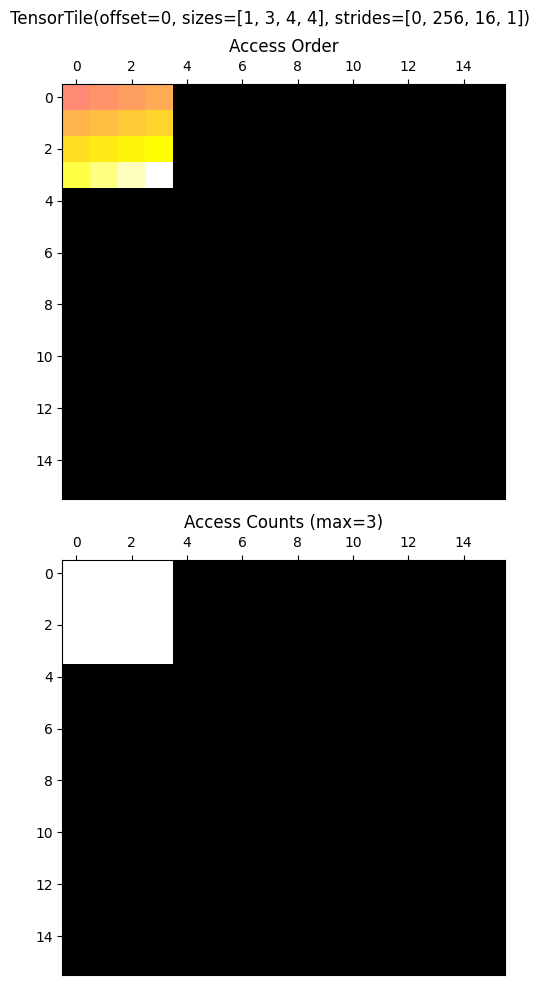

In [8]:
t = TensorTile((16, 16), 0, [1, 3, 4, 4], [0, 16*16, 16, 1])
t.visualize(plot_access_count=True, show_arrows=False)

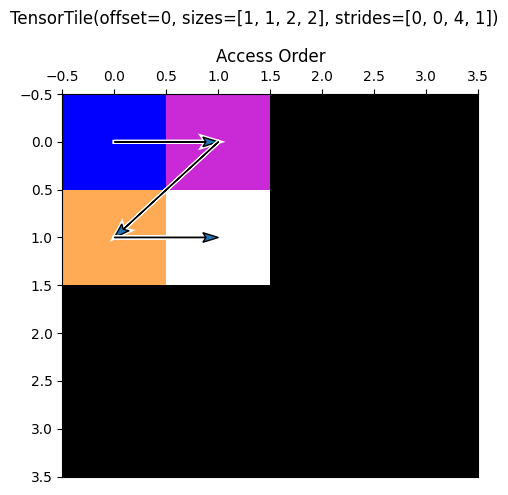

In [9]:
tiles = TensorTileSequence((4, 4), 1, offset=0, sizes=[1, 1, 2, 2], strides=[0, 0, 4, 1])
for t in tiles:
    t.visualize()

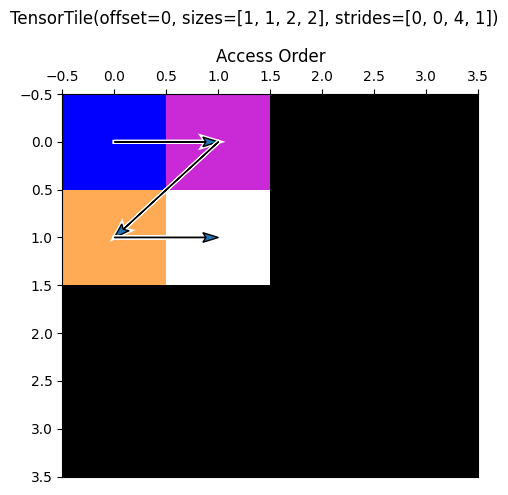

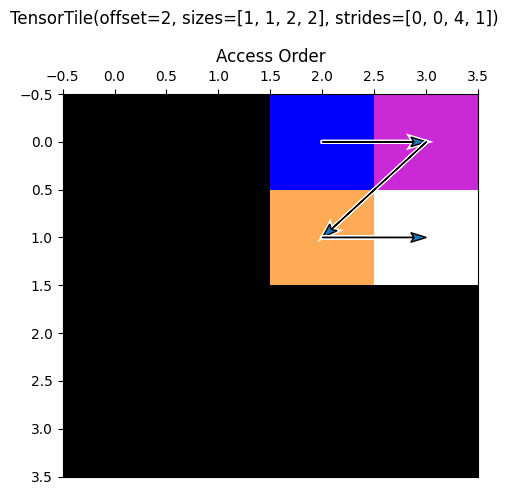

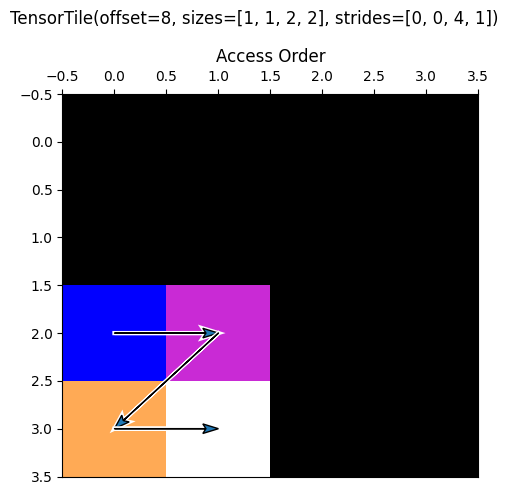

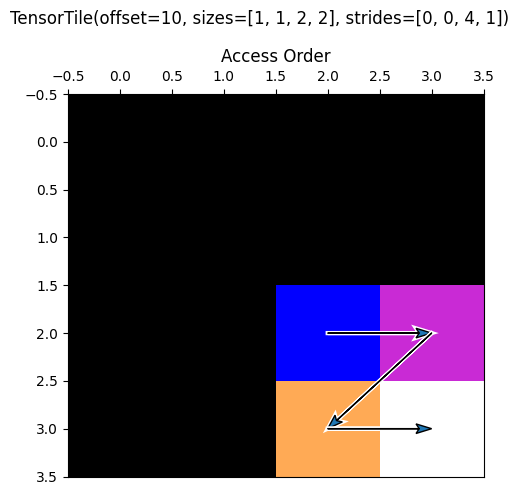

In [10]:
tiles = TensorTiler2D.simple_tiler((4, 4), (2, 2), tile_col_major=False, iter_col_major=False, tile_repeat=1)
for t in tiles:
    t.visualize()

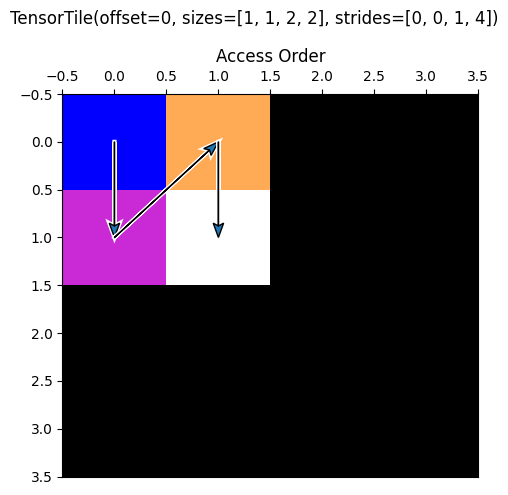

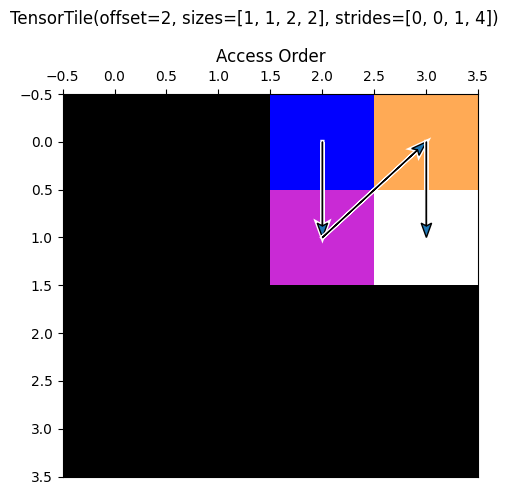

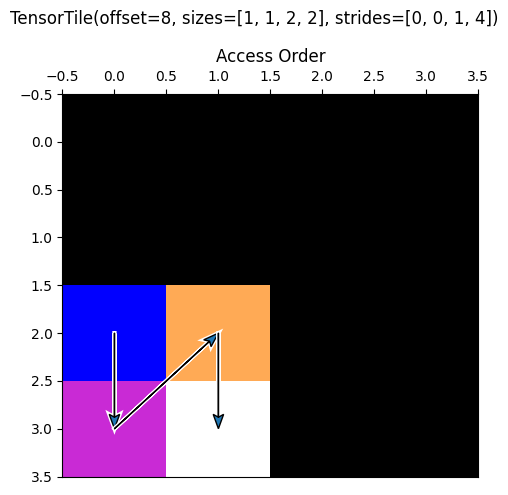

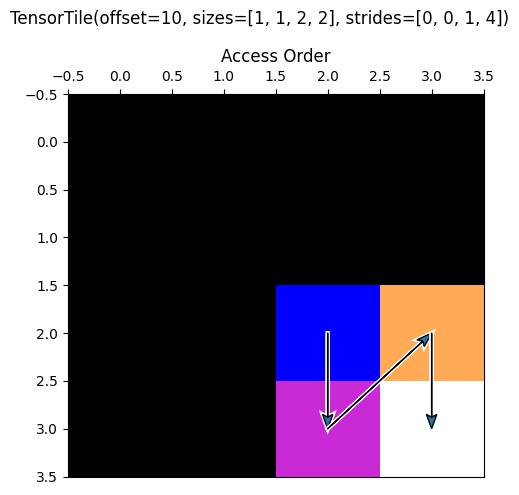

In [11]:
tiles = TensorTiler2D.simple_tiler((4, 4), (2, 2), tile_col_major=True, iter_col_major=False, tile_repeat=1)
for t in tiles:
    t.visualize()

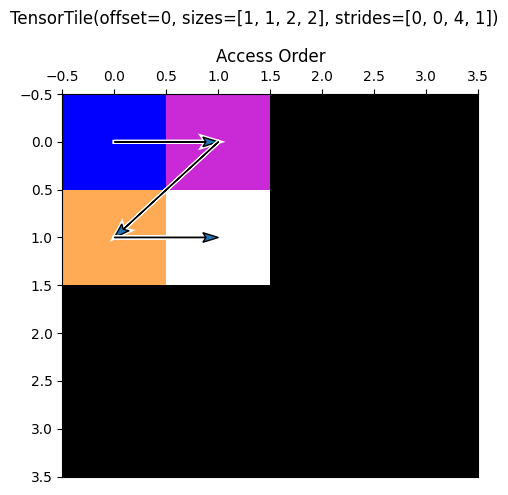

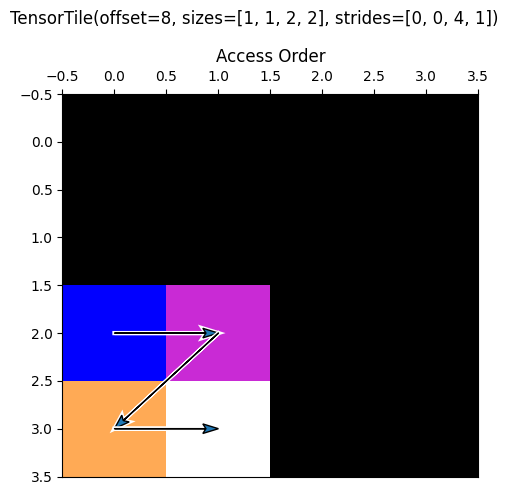

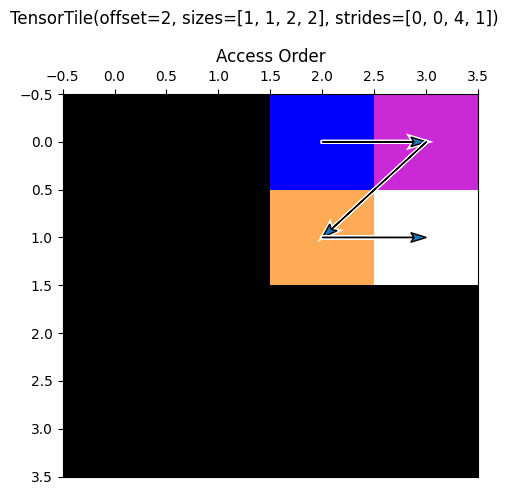

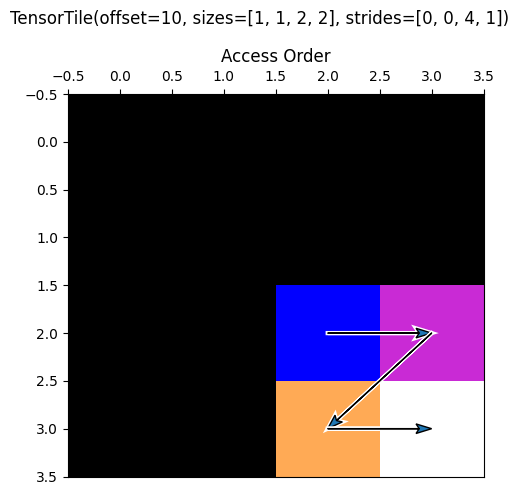

In [12]:
tiles = TensorTiler2D.simple_tiler((4, 4), (2, 2), tile_col_major=False, iter_col_major=True, tile_repeat=1)
for t in tiles:
    t.visualize()

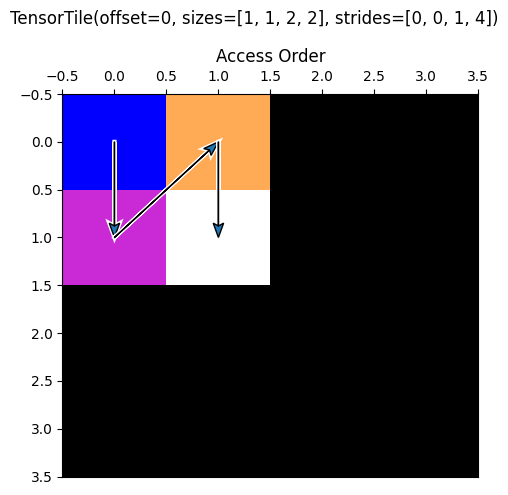

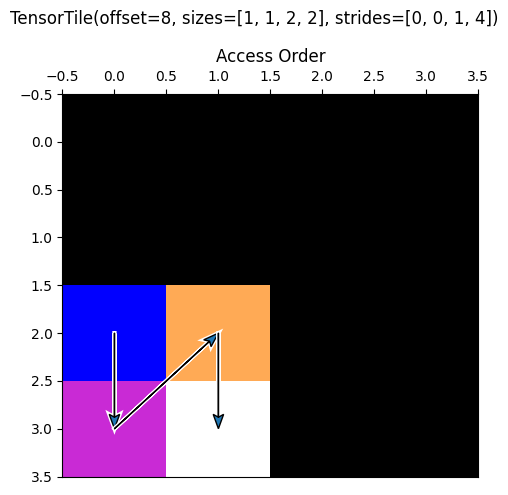

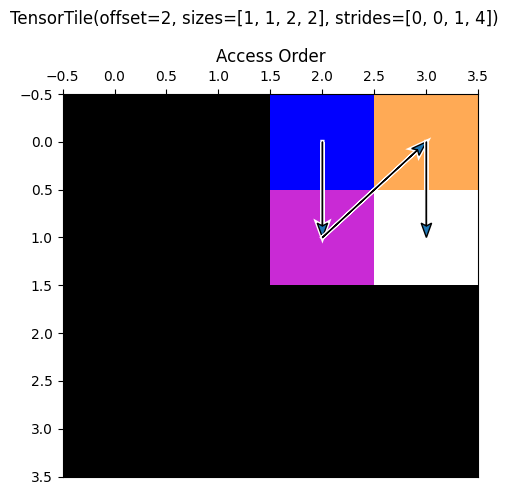

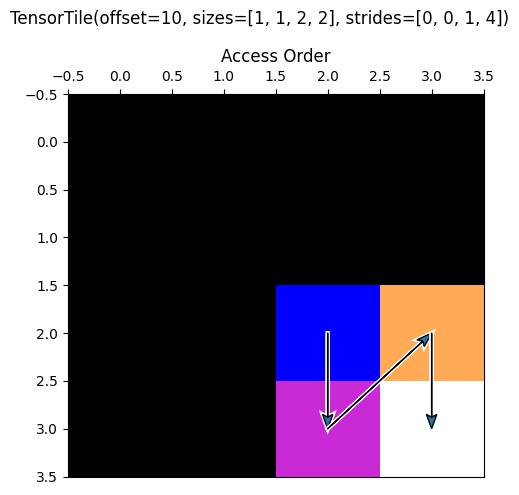

In [13]:
tiles = TensorTiler2D.simple_tiler((4, 4), (2, 2), tile_col_major=True, iter_col_major=True, tile_repeat=1)
for t in tiles:
    t.visualize()

In [14]:
tiles = TensorTiler2D.simple_tiler((4, 4), (2, 2), tile_col_major=True, iter_col_major=True, tile_repeat=2)
#for t in tiles:
#    t.visualize(plot_access_count=True)

ValueError: Format 'gif' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

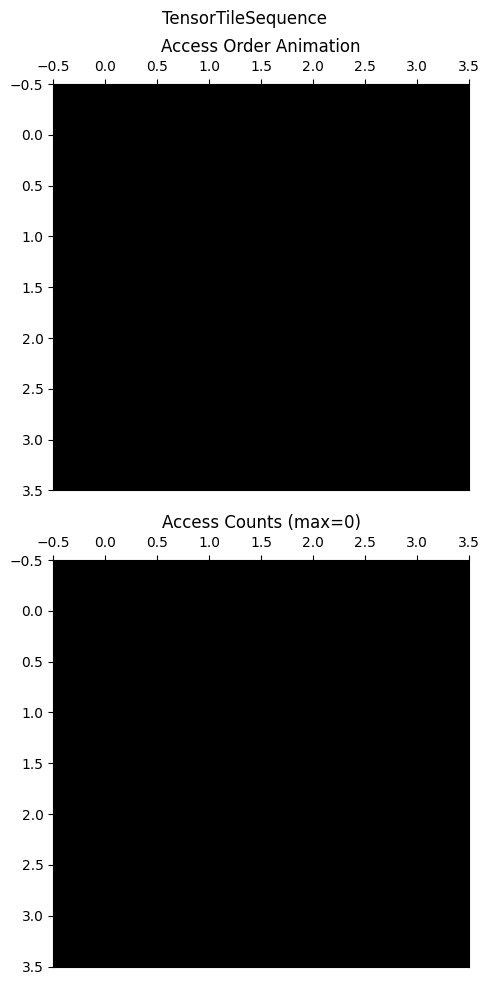

In [15]:
gif_file = "testsave.gif"
tiles.visualize(plot_access_count=True, animate=True, show_plot=False, file_path=gif_file)

from IPython.display import Image
Image(url=gif_file)

In [17]:
import numpy as np
datas = [np.array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]], dtype=np.int32), np.array([[ 4,  6, -1, -1],
       [ 5,  7, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]], dtype=np.int32), np.array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [ 4,  6, -1, -1],
       [ 5,  7, -1, -1]], dtype=np.int32), np.array([[-1, -1,  4,  6],
       [-1, -1,  5,  7],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]], dtype=np.int32), np.array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1,  4,  6],
       [-1, -1,  5,  7]], dtype=np.int32)]

[array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]], dtype=int32), array([[ 4,  6, -1, -1],
       [ 5,  7, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]], dtype=int32), array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [ 4,  6, -1, -1],
       [ 5,  7, -1, -1]], dtype=int32), array([[-1, -1,  4,  6],
       [-1, -1,  5,  7],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]], dtype=int32), array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1,  4,  6],
       [-1, -1,  5,  7]], dtype=int32)]


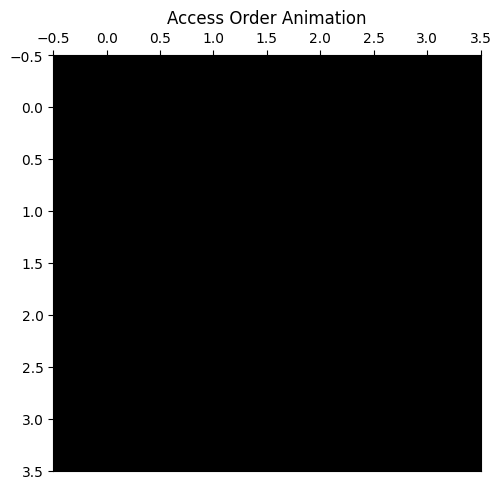

In [28]:
access_order_tensors = datas
print(access_order_tensors)
try:
    import matplotlib.animation as animation
    import matplotlib.pyplot as plt
except:
    raise ImportError(
        "You must pip install matplotlib in order to render access graphs"
    )

def ceildiv(a, b):
    return -(a // -b)

tensor_height, tensor_width = access_order_tensors[0].shape
fig_width = 7
if tensor_width < 32:
    fig_width = 5
height_width_ratio = ceildiv(tensor_height, tensor_width)
fig_height = min(fig_width, fig_width * height_width_ratio)

fig, ax_order = plt.subplots()

fig.set_figheight(fig_height)
fig.set_figwidth(fig_width)

xs = np.arange(access_order_tensors[0].shape[1])
ys = np.arange(access_order_tensors[0].shape[0])

ax_order.xaxis.tick_top()
ax_order.invert_yaxis()
ax_order.set_title("Access Order Animation")
#access_heatmap = ax_order.pcolormesh(xs, ys, access_order_tensors[0], cmap="gnuplot2")

def animate_order(i):
    access_heatmap = ax_order.pcolormesh(xs, ys, access_order_tensors[i], cmap="gnuplot2")
    return access_heatmap

my_animation = animation.FuncAnimation(fig, animate_order, frames=len(access_order_tensors), interval=100*len(access_order_tensors))

plt.tight_layout()
from IPython.display import HTML
HTML(my_animation.to_jshtml())
